In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Querying through RapidAPI

## All matcha recipe ids (id, title, image, imageType)

In [4]:
# querying all dessert recipes
# type = of food, offset = skipping rows, number = number of recipes within results.
import requests
import json

recipe_url = "https://spoonacular-recipe-food-nutrition-v1.p.rapidapi.com/recipes/complexSearch"
recipe_headers = {
	"X-RapidAPI-Key": "46a6460a6dmshdbf8859c5bd80b4p1f0a17jsndede0a39cde9",
	"X-RapidAPI-Host": "spoonacular-recipe-food-nutrition-v1.p.rapidapi.com"
}
# Chose dessert at first however, the total recipe results were too large for the offset number 1700+ > 900 so could not have all the recipes.
# So I changed the query to something more selective e.g. recipes with certain ingredients like matcha (green tea powder)
test_querystring = {"query":"matcha", "offset":"0", "number":"1"}
test_response = requests.request("GET",recipe_url, headers=recipe_headers, params=test_querystring)
# To check just the first result that comes up.
test_response.text

'{"results":[{"id":1077085,"title":"Matcha Bread","image":"https://spoonacular.com/recipeImages/1077085-312x231.jpg","imageType":"jpg"}],"offset":0,"number":1,"totalResults":175}'

### Appending all results from API to new list

In [5]:
# empty pandas dataframe to append all recipes into
empty_list = []

# max limit for each query result is 100 + limit but there are more than 100 recipes
# a loop is created to show 100 recipes and then appended into a new dataframe
for i in range(2):
    recipe_querystring = {"query":"matcha", "offset":f'{i*100}', "number":"100"}
    recipe_response = requests.request("GET", recipe_url, headers=recipe_headers, params=recipe_querystring)
    recipes_json = recipe_response.json()
    recipes_df = pd.json_normalize(recipes_json['results'])
    empty_list.append(recipes_df)
df = pd.concat(empty_list, ignore_index=True)

In [6]:
# delete rows of image type and image as it is not needed; the results of all the image(Type) is the same
df.head()

,id,title,image,imageType
0,1077085,Matcha Bread,https://spoonacular.com/recipeImages/1077085-3...,jpg
1,191754,Matcha Latte,https://spoonacular.com/recipeImages/191754-31...,jpg
2,1087495,Matcha latte,https://spoonacular.com/recipeImages/1087495-3...,jpg
3,1698719,Matcha Latte,https://spoonacular.com/recipeImages/1698719-3...,jpg
4,550569,Matcha Muffins,https://spoonacular.com/recipeImages/550569-31...,jpg


In [7]:
del df['image']

In [8]:
del df['imageType']

In [10]:
df.head()

,id,title
0,1077085,Matcha Bread
1,191754,Matcha Latte
2,1087495,Matcha latte
3,1698719,Matcha Latte
4,550569,Matcha Muffins


### Getting the Ids into a list to put through Nutrition by Id API

In [11]:
# list of id numbers to input into the url in order to get nutrition levels.
id_numbers = df['id']
id_list = []
for i in range(len(id_numbers)):
    append_ids = id_numbers[i]
    id_list.append(append_ids)

In [12]:
id_numbers.head()

0    1077085
1     191754
2    1087495
3    1698719
4     550569
Name: id, dtype: int64

## API for all nutritional values for every Id

In [78]:
# querying through Nutrition by ID
nutrition_headers = {
	"X-RapidAPI-Key": "46a6460a6dmshdbf8859c5bd80b4p1f0a17jsndede0a39cde9",
	"X-RapidAPI-Host": "spoonacular-recipe-food-nutrition-v1.p.rapidapi.com"
}

# Empty list to concat all the nutritional dataset into
nutrition_list = []

# for loop for every id number add the nutrition dataset into a new dataframe
for ids in id_list:
    nutrition_url = "https://spoonacular-recipe-food-nutrition-v1.p.rapidapi.com/recipes/{}/nutritionWidget.json".format(ids)
    nutrition_response = requests.request("GET", nutrition_url, headers=nutrition_headers)
    nutrition_json = nutrition_response.json()
    nutrition_df = pd.json_normalize(nutrition_json)
    nutrition_list.append(nutrition_df)
nutrition_df = pd.concat(nutrition_list, ignore_index=True)

In [37]:
# columns of isStale and expires are not what I am interested in and the values don't really make sense to me.
# Might remove them later on; more importantly most of the data are still in dictionaries within the df.
nutrition_df.head()

,calories,carbs,fat,protein,bad,good,nutrients,properties,flavonoids,ingredients,expires,isStale,caloricBreakdown.percentProtein,caloricBreakdown.percentFat,caloricBreakdown.percentCarbs,weightPerServing.amount,weightPerServing.unit
0,218,21g,14g,7g,"[{'title': 'Calories', 'amount': '218', 'inden...","[{'title': 'Protein', 'amount': '7g', 'indente...","[{'name': 'Calories', 'amount': 218.41, 'unit'...","[{'name': 'Glycemic Index', 'amount': 3.2, 'un...","[{'name': 'Cyanidin', 'amount': 0.18, 'unit': ...","[{'id': 10020080, 'name': 'whole wheat pastry ...",1671511605552,False,12.61,53.14,34.25,75.0,g
1,186,24g,5g,8g,"[{'title': 'Calories', 'amount': '186', 'inden...","[{'title': 'Protein', 'amount': '8g', 'indente...","[{'name': 'Calories', 'amount': 186.9, 'unit':...","[{'name': 'Glycemic Index', 'amount': 53, 'uni...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 19912, 'name': 'agave syrup', 'amount'...",1671511606527,False,17.44,29.11,53.45,208.0,g
2,185,16g,8g,10g,"[{'title': 'Calories', 'amount': '185', 'inden...","[{'title': 'Protein', 'amount': '10g', 'indent...","[{'name': 'Calories', 'amount': 185.6, 'unit':...","[{'name': 'Glycemic Index', 'amount': 74.5, 'u...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 98932, 'name': 'matcha tea', 'amount':...",1671511607926,False,22.84,40.55,36.61,269.0,g
3,289,34g,11g,13g,"[{'title': 'Calories', 'amount': '289', 'inden...","[{'title': 'Protein', 'amount': '13g', 'indent...","[{'name': 'Calories', 'amount': 289.44, 'unit'...","[{'name': 'Glycemic Index', 'amount': 128.27, ...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 98932, 'name': 'matcha powder )', 'amo...",1671511608898,False,17.70,35.70,46.60,404.0,g
4,108,12g,3g,6g,"[{'title': 'Calories', 'amount': '108', 'inden...","[{'title': 'Protein', 'amount': '6g', 'indente...","[{'name': 'Calories', 'amount': 108.91, 'unit'...","[{'name': 'Glycemic Index', 'amount': 16.46, '...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 93607, 'name': 'almond milk', 'amount'...",1671511609762,False,24.26,26.48,49.26,64.0,g


### Filling in Null Values

#### Null Values

In [38]:
#how many missing values are: 97
nutrition_df.isnull().sum()
# Using just the carbs, fat and protein columns they can roughly the caloric Breakdown %s can be calculated by:
# fat% = fat / fat+protein+carbs and etc.

calories                            0
carbs                               0
fat                                 0
protein                             0
bad                                 0
good                                0
nutrients                          97
properties                         97
flavonoids                         97
ingredients                        97
expires                             0
isStale                             0
caloricBreakdown.percentProtein    97
caloricBreakdown.percentFat        97
caloricBreakdown.percentCarbs      97
weightPerServing.amount            97
weightPerServing.unit              97
dtype: int64

In [39]:
# I want to calculate the caloric breakdown %s
#I need to change the dtypes of the carbs, protein and fat to int/float
nutrition_df.dtypes

calories                            object
carbs                               object
fat                                 object
protein                             object
bad                                 object
good                                object
nutrients                           object
properties                          object
flavonoids                          object
ingredients                         object
expires                              int64
isStale                               bool
caloricBreakdown.percentProtein    float64
caloricBreakdown.percentFat        float64
caloricBreakdown.percentCarbs      float64
weightPerServing.amount            float64
weightPerServing.unit               object
dtype: object

In [79]:
# I want to add the total numeric values into one in order to divide carbs/fat/protein from the total to get the %.
# The grams in every column is making it into a string therefore I should get rid of the grams to make the values numeric
# And change the dtype into int/float
nutrition_df['carbs'] = nutrition_df['carbs'].str.strip('g').astype(int)
nutrition_df['fat'] = nutrition_df['fat'].str.strip('g').astype(float)
nutrition_df['protein'] = nutrition_df['protein'].str.strip('g').astype(float)

In [80]:
nutrition_df.head()

,calories,carbs,fat,protein,bad,good,nutrients,properties,flavonoids,ingredients,expires,isStale,caloricBreakdown.percentProtein,caloricBreakdown.percentFat,caloricBreakdown.percentCarbs,weightPerServing.amount,weightPerServing.unit
0,218,21,14.0,7.0,"[{'title': 'Calories', 'amount': '218', 'inden...","[{'title': 'Protein', 'amount': '7g', 'indente...","[{'name': 'Calories', 'amount': 218.41, 'unit'...","[{'name': 'Glycemic Index', 'amount': 3.2, 'un...","[{'name': 'Cyanidin', 'amount': 0.18, 'unit': ...","[{'id': 10020080, 'name': 'whole wheat pastry ...",1671511605552,False,12.61,53.14,34.25,75.0,g
1,186,24,5.0,8.0,"[{'title': 'Calories', 'amount': '186', 'inden...","[{'title': 'Protein', 'amount': '8g', 'indente...","[{'name': 'Calories', 'amount': 186.9, 'unit':...","[{'name': 'Glycemic Index', 'amount': 53, 'uni...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 19912, 'name': 'agave syrup', 'amount'...",1671511606527,False,17.44,29.11,53.45,208.0,g
2,185,16,8.0,10.0,"[{'title': 'Calories', 'amount': '185', 'inden...","[{'title': 'Protein', 'amount': '10g', 'indent...","[{'name': 'Calories', 'amount': 185.6, 'unit':...","[{'name': 'Glycemic Index', 'amount': 74.5, 'u...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 98932, 'name': 'matcha tea', 'amount':...",1671511607926,False,22.84,40.55,36.61,269.0,g
3,289,34,11.0,13.0,"[{'title': 'Calories', 'amount': '289', 'inden...","[{'title': 'Protein', 'amount': '13g', 'indent...","[{'name': 'Calories', 'amount': 289.44, 'unit'...","[{'name': 'Glycemic Index', 'amount': 128.27, ...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 98932, 'name': 'matcha powder )', 'amo...",1671511608898,False,17.70,35.70,46.60,404.0,g
4,108,12,3.0,6.0,"[{'title': 'Calories', 'amount': '108', 'inden...","[{'title': 'Protein', 'amount': '6g', 'indente...","[{'name': 'Calories', 'amount': 108.91, 'unit'...","[{'name': 'Glycemic Index', 'amount': 16.46, '...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 93607, 'name': 'almond milk', 'amount'...",1671511609762,False,24.26,26.48,49.26,64.0,g


In [81]:
#drop expires or the sum would include the values of that column.
del nutrition_df['expires']

In [82]:
# I can calculate the values.
na_rows = nutrition_df[nutrition_df['caloricBreakdown.percentCarbs'].isnull()]
# change the total to string or when sum() is used the value will end up being doubled.
na_rows['total'] = na_rows.sum(axis=1, numeric_only=True).astype(str)
# changed the total back to numeric and to get the percentage of the breakdowns.
na_rows['total'] = na_rows['total'].astype(float)
na_rows.head()

C:\Users\alice\AppData\Local\Temp\ipykernel_708\1004772752.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_rows['total'] = na_rows.sum(axis=1, numeric_only=True).astype(str)
C:\Users\alice\AppData\Local\Temp\ipykernel_708\1004772752.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_rows['total'] = na_rows['total'].astype(float)


,calories,carbs,fat,protein,bad,good,nutrients,properties,flavonoids,ingredients,isStale,caloricBreakdown.percentProtein,caloricBreakdown.percentFat,caloricBreakdown.percentCarbs,weightPerServing.amount,weightPerServing.unit,total
7,537k,74,20.0,13.0,"[{'title': 'Calories', 'amount': '537k', 'inde...","[{'title': 'Protein', 'amount': '13g', 'indent...",NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,108.0
8,407k,42,17.0,24.0,"[{'title': 'Calories', 'amount': '407k', 'inde...","[{'title': 'Protein', 'amount': '24g', 'indent...",NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,84.0
12,260k,14,12.0,22.0,"[{'title': 'Calories', 'amount': '260k', 'inde...","[{'title': 'Protein', 'amount': '22g', 'indent...",NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,49.0
13,547k,53,34.0,8.0,"[{'title': 'Calories', 'amount': '547k', 'inde...","[{'title': 'Protein', 'amount': '8g', 'indente...",NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,96.0
14,52k,4,2.0,2.0,"[{'title': 'Calories', 'amount': '52k', 'inden...","[{'title': 'Protein', 'amount': '2g', 'indente...",NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,9.0


In [83]:
#calculating the % = carbs/total * 100%
na_rows['caloricBreakdown.percentCarbs'] = na_rows['carbs']/na_rows['total'] * 100
na_rows['caloricBreakdown.percentCarbs']

C:\Users\alice\AppData\Local\Temp\ipykernel_708\3025099118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_rows['caloricBreakdown.percentCarbs'] = na_rows['carbs']/na_rows['total'] * 100


7      68.518519
8      50.000000
12     28.571429
13     55.208333
14     44.444444
         ...    
164    74.358974
168    68.571429
171    71.428571
173    60.483871
174    65.909091
Name: caloricBreakdown.percentCarbs, Length: 97, dtype: float64

In [84]:
# add the values back into the main dataframe
nutrition_df.loc[nutrition_df['caloricBreakdown.percentCarbs'].isnull(), 'caloricBreakdown.percentCarbs'] = na_rows['caloricBreakdown.percentCarbs']
nutrition_df.iloc[[7]]

,calories,carbs,fat,protein,bad,good,nutrients,properties,flavonoids,ingredients,isStale,caloricBreakdown.percentProtein,caloricBreakdown.percentFat,caloricBreakdown.percentCarbs,weightPerServing.amount,weightPerServing.unit
7,537k,74,20.0,13.0,"[{'title': 'Calories', 'amount': '537k', 'inde...","[{'title': 'Protein', 'amount': '13g', 'indent...",NaN,NaN,NaN,NaN,True,NaN,NaN,68.518519,NaN,NaN


In [85]:
#calculating the % = fat/total * 100%
na_rows['caloricBreakdown.percentFat'] = na_rows['fat']/na_rows['total'] * 100
na_rows['caloricBreakdown.percentFat']

C:\Users\alice\AppData\Local\Temp\ipykernel_708\2670501960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_rows['caloricBreakdown.percentFat'] = na_rows['fat']/na_rows['total'] * 100


7      18.518519
8      20.238095
12     24.489796
13     35.416667
14     22.222222
         ...    
164    17.948718
168    14.285714
171    21.428571
173    28.225806
174    18.181818
Name: caloricBreakdown.percentFat, Length: 97, dtype: float64

In [87]:
nutrition_df.loc[nutrition_df['caloricBreakdown.percentFat'].isnull(), 'caloricBreakdown.percentFat'] = na_rows['caloricBreakdown.percentFat']
nutrition_df.iloc[[7]]

,calories,carbs,fat,protein,bad,good,nutrients,properties,flavonoids,ingredients,isStale,caloricBreakdown.percentProtein,caloricBreakdown.percentFat,caloricBreakdown.percentCarbs,weightPerServing.amount,weightPerServing.unit
7,537k,74,20.0,13.0,"[{'title': 'Calories', 'amount': '537k', 'inde...","[{'title': 'Protein', 'amount': '13g', 'indent...",NaN,NaN,NaN,NaN,True,NaN,18.518519,68.518519,NaN,NaN


In [86]:
#calculating the % = protein/total * 100%
na_rows['caloricBreakdown.percentProtein'] = na_rows['protein']/na_rows['total'] * 100
na_rows['caloricBreakdown.percentProtein']

C:\Users\alice\AppData\Local\Temp\ipykernel_708\3084103032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  na_rows['caloricBreakdown.percentProtein'] = na_rows['protein']/na_rows['total'] * 100


7      12.037037
8      28.571429
12     44.897959
13      8.333333
14     22.222222
         ...    
164     6.410256
168    14.285714
171     3.571429
173    10.483871
174    13.636364
Name: caloricBreakdown.percentProtein, Length: 97, dtype: float64

In [88]:
nutrition_df.loc[nutrition_df['caloricBreakdown.percentProtein'].isnull(), 'caloricBreakdown.percentProtein'] = na_rows['caloricBreakdown.percentProtein']
nutrition_df.iloc[[7]]

,calories,carbs,fat,protein,bad,good,nutrients,properties,flavonoids,ingredients,isStale,caloricBreakdown.percentProtein,caloricBreakdown.percentFat,caloricBreakdown.percentCarbs,weightPerServing.amount,weightPerServing.unit
7,537k,74,20.0,13.0,"[{'title': 'Calories', 'amount': '537k', 'inde...","[{'title': 'Protein', 'amount': '13g', 'indent...",NaN,NaN,NaN,NaN,True,12.037037,18.518519,68.518519,NaN,NaN


In [89]:
nutrition_df.isnull().sum()

calories                            0
carbs                               0
fat                                 0
protein                             0
bad                                 0
good                                0
nutrients                          97
properties                         97
flavonoids                         97
ingredients                        97
isStale                             0
caloricBreakdown.percentProtein     0
caloricBreakdown.percentFat         0
caloricBreakdown.percentCarbs       0
weightPerServing.amount            97
weightPerServing.unit              97
dtype: int64

### Columns

#### Bad Column

In [620]:
nutrition_df.head()

,calories,carbs,fat,protein,bad,good,nutrients,properties,flavonoids,ingredients,caloricBreakdown.percentProtein,caloricBreakdown.percentFat,caloricBreakdown.percentCarbs,weightPerServing.amount,weightPerServing.unit
0,218,21g,14g,7g,"[{'title': 'Calories', 'amount': '218', 'inden...","[{'title': 'Protein', 'amount': '7g', 'indente...","[{'name': 'Calories', 'amount': 218.41, 'unit'...","[{'name': 'Glycemic Index', 'amount': 3.2, 'un...","[{'name': 'Cyanidin', 'amount': 0.18, 'unit': ...","[{'id': 10020080, 'name': 'whole wheat pastry ...",12.61,53.14,34.25,75.0,g
1,186,24g,5g,8g,"[{'title': 'Calories', 'amount': '186', 'inden...","[{'title': 'Protein', 'amount': '8g', 'indente...","[{'name': 'Calories', 'amount': 186.9, 'unit':...","[{'name': 'Glycemic Index', 'amount': 53.0, 'u...","[{'name': 'Cyanidin', 'amount': 0.0, 'unit': '...","[{'id': 19912, 'name': 'agave syrup', 'amount'...",17.44,29.11,53.45,208.0,g
2,185,16g,8g,10g,"[{'title': 'Calories', 'amount': '185', 'inden...","[{'title': 'Protein', 'amount': '10g', 'indent...","[{'name': 'Calories', 'amount': 185.6, 'unit':...","[{'name': 'Glycemic Index', 'amount': 74.5, 'u...","[{'name': 'Cyanidin', 'amount': 0.0, 'unit': '...","[{'id': 98932, 'name': 'matcha tea', 'amount':...",22.84,40.55,36.61,269.0,g
3,289,34g,11g,13g,"[{'title': 'Calories', 'amount': '289', 'inden...","[{'title': 'Protein', 'amount': '13g', 'indent...","[{'name': 'Calories', 'amount': 289.44, 'unit'...","[{'name': 'Glycemic Index', 'amount': 128.27, ...","[{'name': 'Cyanidin', 'amount': 0.0, 'unit': '...","[{'id': 98932, 'name': 'matcha powder )', 'amo...",17.70,35.70,46.60,404.0,g
4,108,12g,3g,6g,"[{'title': 'Calories', 'amount': '108', 'inden...","[{'title': 'Protein', 'amount': '6g', 'indente...","[{'name': 'Calories', 'amount': 108.91, 'unit'...","[{'name': 'Glycemic Index', 'amount': 16.46, '...","[{'name': 'Cyanidin', 'amount': 0.0, 'unit': '...","[{'id': 93607, 'name': 'almond milk', 'amount'...",24.26,26.48,49.26,64.0,g


In [298]:
# What the bad column of the first row (Matcha Bread) looks like:
bad_df = pd.json_normalize(nutrition_df['bad'][0])
bad_df
# The % of daily needs can be compared to the caloric Breakdown % of the recipes.
# Indented = whether the title is indented or not e.g. saturated fat in under fat in food labels. Not really needed.
# The calories are too high and there is too much fat + carbs. Fat = 53.14/22.52 while carbs = 34.25/7.08

,title,amount,indented,percentOfDailyNeeds
0,Calories,218,False,10.92
1,Fat,14g,False,22.52
2,Saturated Fat,5g,True,33.84
3,Carbohydrates,21g,False,7.08
4,Sugar,0.81g,True,0.90
5,Cholesterol,32mg,False,10.91
6,Sodium,208mg,False,9.07
7,Alcohol,0.21g,False,1.15


#### Good column

In [299]:
# What the good column of the first row (Matcha Bread) looks like:
good_df = pd.json_normalize(nutrition_df['good'][0])
good_df
# The % of daily needs can be compared to the caloric Breakdown % of the recipes.
# The % of daily needs of fat, carbs and protein can be added into the df to compare with the % breakdown of the recipes.

,title,amount,indented,percentOfDailyNeeds
0,Protein,7g,False,15.63
1,Manganese,0.9mg,False,45.07
2,Selenium,14µg,False,20.17
3,Fiber,3g,False,15.10
4,Phosphorus,143mg,False,14.36
5,Vitamin E,2mg,False,13.71
6,Magnesium,45mg,False,11.30
7,Iron,1mg,False,9.77
8,Vitamin B2,0.15mg,False,8.94
9,Calcium,87mg,False,8.79


#### Nutrition column

In [283]:
# What the good column of the first row (Matcha Bread) looks like:
# Has the full % of daily needs which I will extract from to be able to compare the recipes % caloric breakdown
nutrient_df = pd.json_normalize(nutrition_df['nutrients'][0])
nutrient_df

,name,amount,unit,percentOfDailyNeeds
0,Calories,218.41,kcal,10.92
1,Fat,14.64,g,22.52
2,Saturated Fat,5.42,g,33.84
3,Carbohydrates,21.23,g,7.08
4,Net Carbohydrates,17.45,g,6.35
5,Sugar,0.81,g,0.90
6,Cholesterol,32.74,mg,10.91
7,Sodium,208.71,mg,9.07
8,Alcohol,0.21,g,1.15
9,Protein,7.82,g,15.63


#### Properties column

In [91]:
properties_df = pd.json_normalize(nutrition_df['properties'][5])
properties_df

,name,amount,unit
0,Glycemic Index,25.320000,
1,Glycemic Load,8.490000,
2,Nutrition Score,5.118696,%


#### Flavoniods column

In [289]:
flavonoids_df = pd.json_normalize(nutrition_df['flavonoids'][0])
flavonoids_df = flavonoids_df[~(flavonoids_df == 0).any(axis=1)]
flavonoids_df

,name,amount,unit
0,Cyanidin,0.18,mg
6,Catechin,0.09,mg
7,Epigallocatechin,0.19,mg
8,Epicatechin,0.05,mg
9,Epicatechin 3-gallate,0.01,mg
10,Epigallocatechin 3-gallate,0.01,mg
12,Thearubigins,0.08,mg
13,Eriodictyol,0.02,mg
15,Naringenin,0.03,mg
18,Isorhamnetin,0.19,mg


#### Ingredients column

In [290]:
ingredients_df = pd.json_normalize(nutrition_df['ingredients'][0])
ingredients_df

,id,name,amount,unit,nutrients
0,10020080,whole wheat pastry flour,0.15,cups,"[{'name': 'Net Carbohydrates', 'amount': 11.03..."
1,93740,blanched almond flour,0.08,cup,"[{'name': 'Net Carbohydrates', 'amount': 0.89,..."
2,2047,salt,0.05,teaspoon,"[{'name': 'Net Carbohydrates', 'amount': 0.0, ..."
3,18371,baking powder,0.10,teaspoon,"[{'name': 'Net Carbohydrates', 'amount': 0.18,..."
4,18372,baking soda,0.05,teaspoon,"[{'name': 'Net Carbohydrates', 'amount': 0.0, ..."
5,98932,matcha powder,0.13,tablespoon,"[{'name': 'Net Carbohydrates', 'amount': 0.0, ..."
6,93607,almond milk,0.08,cup,"[{'name': 'Net Carbohydrates', 'amount': 0.02,..."
7,10014355,green tea,0.10,bag,"[{'name': 'Net Carbohydrates', 'amount': 0.0, ..."
8,4047,coconut oil,0.03,cup,"[{'name': 'Net Carbohydrates', 'amount': 0.05,..."
9,1123,eggs,0.20,,"[{'name': 'Net Carbohydrates', 'amount': 0.06,..."


##### Nutrition of ingredients column

In [621]:
#Already have the total nutrientional value of everything included in the recipe
#So is not necessarily needed
#But could be useful for more indepth research.
ingred_nutri_df = pd.json_normalize(ingredients_df['nutrients'][0])
ingred_nutri_df

,name,amount,unit,percentOfDailyNeeds
0,Net Carbohydrates,11.03,g,6.35
1,Vitamin B1,0.09,mg,7.24
2,Fat,0.45,g,22.52
3,Protein,2.38,g,15.63
4,Carbohydrates,12.95,g,7.08
5,Vitamin B6,0.07,mg,4.91
6,Sodium,0.36,mg,9.07
7,Poly Unsaturated Fat,0.21,g,0.00
8,Cholesterol,0.00,mg,10.91
9,Sugar,0.07,g,0.90


## Matcha Recipes Dataframe

### Matcha Recipes

In [113]:
#concat both dataframes into 1
# all units of carbs, fat, protein are in grams
recipes_df = pd.concat([df,nutrition_df], axis = 1, join='inner')
recipes_df.iloc[[7]]

,id,title,calories,carbs,fat,protein,bad,good,nutrients,properties,flavonoids,ingredients,isStale,caloricBreakdown.percentProtein,caloricBreakdown.percentFat,caloricBreakdown.percentCarbs,weightPerServing.amount,weightPerServing.unit
7,756817,Matcha Pancakes,537k,74,20.0,13.0,"[{'title': 'Calories', 'amount': '537k', 'inde...","[{'title': 'Protein', 'amount': '13g', 'indent...",NaN,NaN,NaN,NaN,True,12.037037,18.518519,68.518519,NaN,NaN


In [114]:
# change calories into numeric dtype
recipes_df['calories'] = recipes_df['calories'].str.strip('k').astype(int)
recipes_df.iloc[[7]]

,id,title,calories,carbs,fat,protein,bad,good,nutrients,properties,flavonoids,ingredients,isStale,caloricBreakdown.percentProtein,caloricBreakdown.percentFat,caloricBreakdown.percentCarbs,weightPerServing.amount,weightPerServing.unit
7,756817,Matcha Pancakes,537,74,20.0,13.0,"[{'title': 'Calories', 'amount': '537k', 'inde...","[{'title': 'Protein', 'amount': '13g', 'indent...",NaN,NaN,NaN,NaN,True,12.037037,18.518519,68.518519,NaN,NaN


### Summary

In [115]:
# summary of all numeric type data
breakdown_df = recipes_df.drop(['id', 'title', 'bad', 'good', 'nutrients', 'properties',
                                'flavonoids', 'ingredients', 'weightPerServing.amount', 'weightPerServing.unit'], axis=1)

In [116]:
breakdown_df.describe()

,calories,carbs,fat,protein,caloricBreakdown.percentProtein,caloricBreakdown.percentFat,caloricBreakdown.percentCarbs
count,175.000000,175.000000,175.00000,175.000000,175.000000,175.000000,175.000000
mean,278.382857,29.240000,14.28440,8.029657,14.862125,33.494553,49.551871
std,192.261307,22.671304,14.02312,8.741722,12.629410,20.530939,20.142684
min,8.000000,1.000000,0.01000,0.150000,1.219512,0.410000,5.263158
25%,126.500000,12.000000,4.00000,3.000000,6.884323,17.770898,32.886667
50%,236.000000,22.000000,9.00000,6.000000,10.526316,30.810000,49.450549
75%,383.000000,42.000000,20.50000,10.000000,17.505000,47.471154,64.961637
max,1045.000000,102.000000,79.00000,71.000000,67.820000,82.650000,96.341463


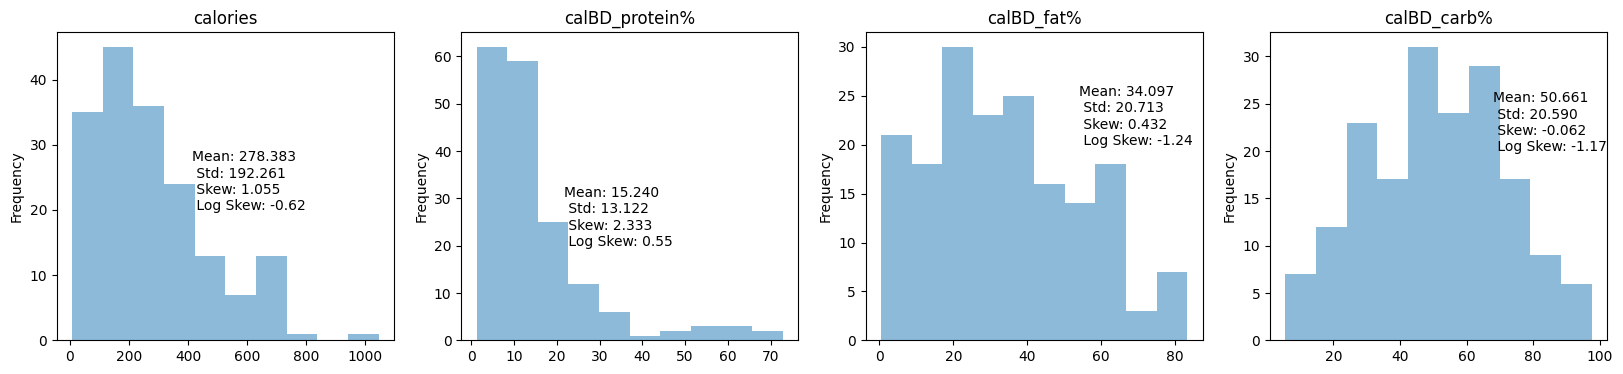

In [632]:
#bar graph of the number of recipes by column title
fig, axes = plt.subplots(1, 4, figsize=(20,4))

for i, ax in enumerate(axes.reshape(-1)):
    plot_df = breakdown_df[breakdown_df.columns[i]]
    plot_df.plot.hist(ax=ax, title=breakdown_df.columns[i], alpha=0.5)
    ax.text(plot_df.quantile(0.8), 20, f"Mean: {plot_df.mean():.3f} \n Std: {plot_df.std():.3f} \n Skew: {plot_df.skew():.3f} \n Log Skew: {np.log(plot_df+1).skew():.2f}")
plt.show()

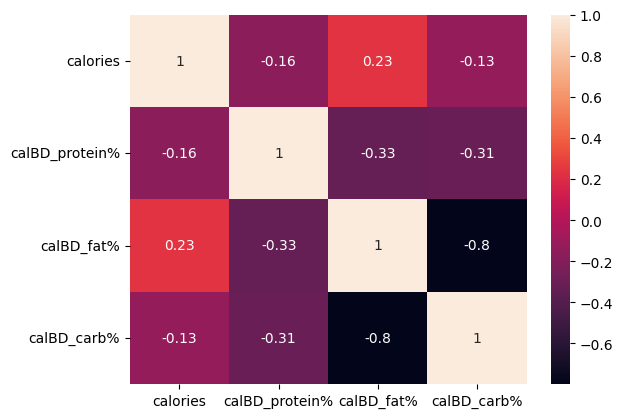

In [593]:
corref_ax = sns.heatmap(breakdown_df.corr(), annot=True)
# When there is more fat = less carbs and when there is less fat more carbs.

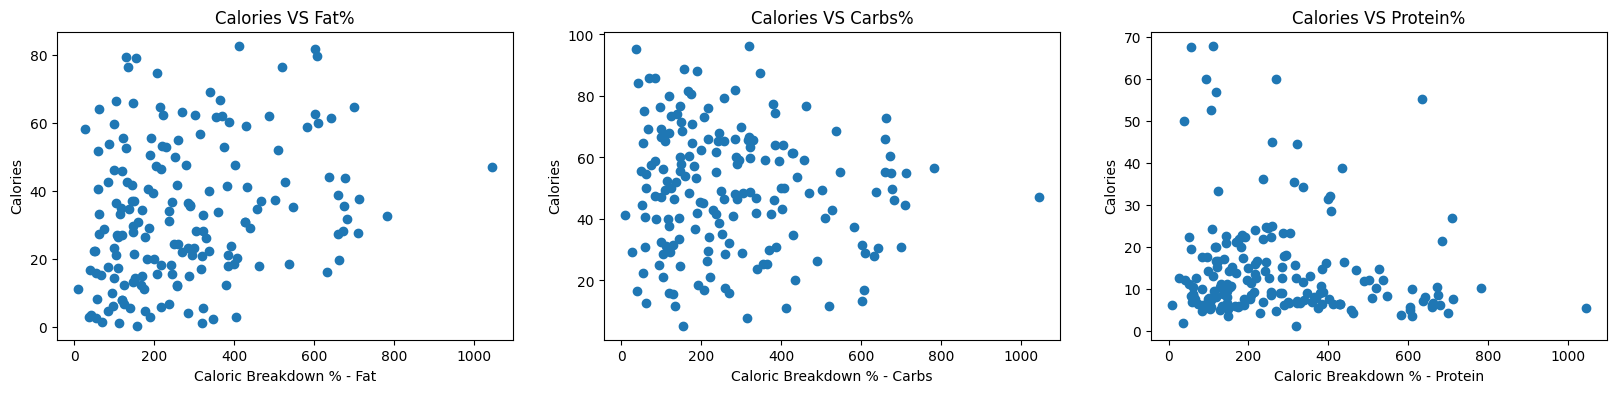

In [149]:
# scatter plot of caloric breakdown %s and calories
fig, axes = plt.subplots(1, 3, figsize=(20,4))
axes[0].scatter(breakdown_df['calories'], breakdown_df['caloricBreakdown.percentFat'])
axes[0].set_title('Calories VS Fat%')
axes[0].set(xlabel='Caloric Breakdown % - Fat', ylabel='Calories')
axes[1].scatter(breakdown_df['calories'], breakdown_df['caloricBreakdown.percentCarbs'])
axes[1].set_title('Calories VS Carbs%')
axes[1].set(xlabel='Caloric Breakdown % - Carbs', ylabel='Calories')
axes[2].scatter(breakdown_df['calories'], breakdown_df['caloricBreakdown.percentProtein'])
axes[2].set_title('Calories VS Protein%')
axes[2].set(xlabel='Caloric Breakdown % - Protein', ylabel='Calories')
    
plt.show()

In [196]:
# the difference between high and low fat/carbs%
recp_carbs_over50 = recipes_df[recipes_df['caloricBreakdown.percentCarbs'] >= 50]
recp_carbs_under50 = recipes_df[recipes_df['caloricBreakdown.percentCarbs'] < 50]

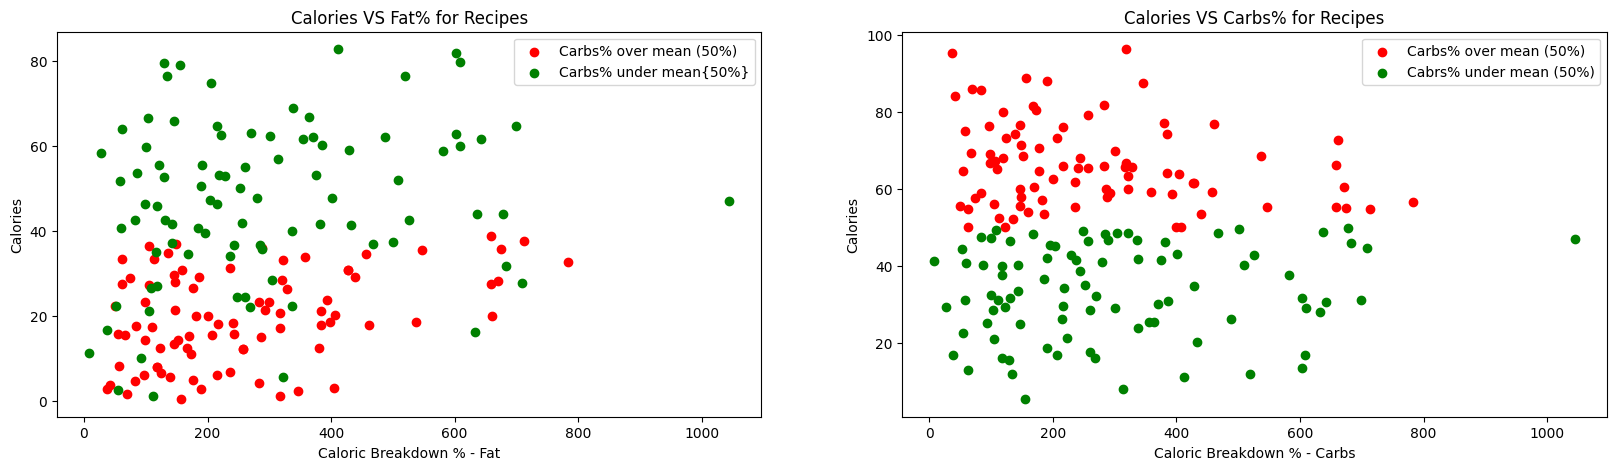

In [197]:
# scatter plot of the difference in low/high carbs content compared to the fat% and carbs%
fig, axes = plt.subplots(1, 2, figsize=(20,5))
axes[0].scatter(recp_carbs_over50['calories'], recp_carbs_over50['caloricBreakdown.percentFat'], c = 'red', label = 'Carbs% over mean (50%)')
axes[0].scatter(recp_carbs_under50['calories'], recp_carbs_under50['caloricBreakdown.percentFat'], c = 'green', label = 'Carbs% under mean{50%}')
axes[0].set_title('Calories VS Fat% for Recipes')
axes[0].set(xlabel='Caloric Breakdown % - Fat', ylabel='Calories')
axes[0].legend()
axes[1].scatter(recp_carbs_over50['calories'], recp_carbs_over50['caloricBreakdown.percentCarbs'], c = 'red', label = 'Carbs% over mean (50%)')
axes[1].scatter(recp_carbs_under50['calories'], recp_carbs_under50['caloricBreakdown.percentCarbs'], c = 'green', label = 'Carbs% under mean (50%)')
axes[1].set_title('Calories VS Carbs% for Recipes')
axes[1].set(xlabel='Caloric Breakdown % - Carbs', ylabel='Calories')
axes[1].legend()
plt.show()

In [198]:
recp_fat_over35 = recipes_df[recipes_df['caloricBreakdown.percentFat'] >= 35]
recp_fat_under35 = recipes_df[recipes_df['caloricBreakdown.percentFat'] < 35]

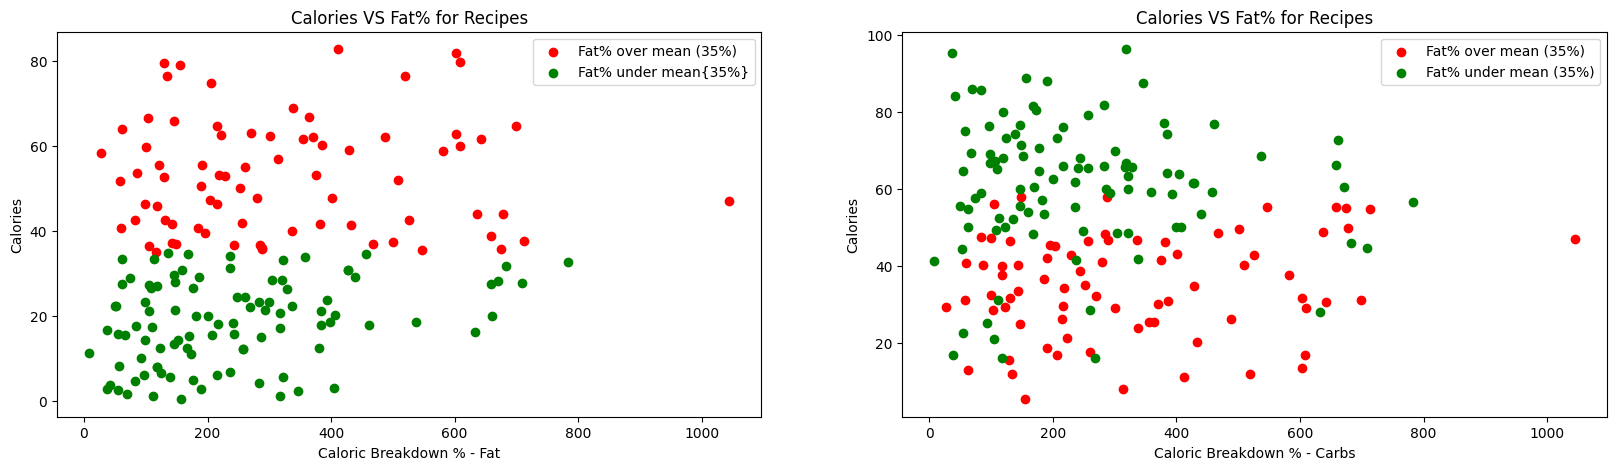

In [200]:
# scatter plot of the difference in low/high carbs content compared to the fat% and carbs%
fig, axes = plt.subplots(1, 2, figsize=(20,5))
axes[0].scatter(recp_fat_over35['calories'], recp_fat_over35['caloricBreakdown.percentFat'], c = 'red', label = 'Fat% over mean (35%)')
axes[0].scatter(recp_fat_under35['calories'], recp_fat_under35['caloricBreakdown.percentFat'], c = 'green', label = 'Fat% under mean{35%}')
axes[0].set_title('Calories VS Fat% for Recipes')
axes[0].set(xlabel='Caloric Breakdown % - Fat', ylabel='Calories')
axes[0].legend()
axes[1].scatter(recp_fat_over35['calories'], recp_fat_over35['caloricBreakdown.percentCarbs'], c = 'red', label = 'Fat% over mean (35%)')
axes[1].scatter(recp_fat_under35['calories'], recp_fat_under35['caloricBreakdown.percentCarbs'], c = 'green', label = 'Fat% under mean (35%)')
axes[1].set_title('Calories VS Fat% for Recipes')
axes[1].set(xlabel='Caloric Breakdown % - Carbs', ylabel='Calories')
axes[1].legend()
plt.show()

#### Percentage of Daily Needs

In [627]:
daily_needs = nutrient_df.loc[(nutrient_df['name'] == 'Calories') | (nutrient_df['name'] == 'Fat') | 
                             (nutrient_df['name'] == 'Carbohydrates') | (nutrient_df['name'] == 'Protein')]
daily_needs

,name,amount,unit,percentOfDailyNeeds
0,Calories,218.41,kcal,10.92
1,Fat,14.64,g,22.52
3,Carbohydrates,21.23,g,7.08
9,Protein,7.82,g,15.63


This was misunderstood as I thought the % of daily needs was overall what the human body needs. But it appears to be what the % of this certain ingredient contained. Which can be further examined.

### Difference Between similar recipes

#### Dataframe

,id,title,calories,carbs,fat,protein,bad,good,nutrients,properties,flavonoids,ingredients,isStale,caloricBreakdown.percentProtein,caloricBreakdown.percentFat,caloricBreakdown.percentCarbs,weightPerServing.amount,weightPerServing.unit
0,1077085,Matcha Bread,218,21,14.0,7.0,"[{'title': 'Calories', 'amount': '218', 'inden...","[{'title': 'Protein', 'amount': '7g', 'indente...","[{'name': 'Calories', 'amount': 218.41, 'unit'...","[{'name': 'Glycemic Index', 'amount': 3.2, 'un...","[{'name': 'Cyanidin', 'amount': 0.18, 'unit': ...","[{'id': 10020080, 'name': 'whole wheat pastry ...",False,12.61,53.14,34.25,75.0,g
2,1087495,Matcha latte,185,16,8.0,10.0,"[{'title': 'Calories', 'amount': '185', 'inden...","[{'title': 'Protein', 'amount': '10g', 'indent...","[{'name': 'Calories', 'amount': 185.6, 'unit':...","[{'name': 'Glycemic Index', 'amount': 74.5, 'u...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 98932, 'name': 'matcha tea', 'amount':...",False,22.84,40.55,36.61,269.0,g
3,1698719,Matcha Latte,289,34,11.0,13.0,"[{'title': 'Calories', 'amount': '289', 'inden...","[{'title': 'Protein', 'amount': '13g', 'indent...","[{'name': 'Calories', 'amount': 289.44, 'unit'...","[{'name': 'Glycemic Index', 'amount': 128.27, ...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 98932, 'name': 'matcha powder )', 'amo...",False,17.70,35.70,46.60,404.0,g
9,1086946,Matcha madeleines,86,8,5.0,1.0,"[{'title': 'Calories', 'amount': '86', 'indent...","[{'title': 'Protein', 'amount': '1g', 'indente...","[{'name': 'Calories', 'amount': 86.36, 'unit':...","[{'name': 'Glycemic Index', 'amount': 8.22, 'u...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 1123, 'name': 'eggs', 'amount': 0.08, ...",False,6.22,53.67,40.11,20.0,g
11,1751701,Matcha Cheesecake,603,48,42.0,8.0,"[{'title': 'Calories', 'amount': '603', 'inden...","[{'title': 'Protein', 'amount': '8g', 'indente...","[{'name': 'Calories', 'amount': 603.38, 'unit'...","[{'name': 'Glycemic Index', 'amount': 24.12, '...","[{'name': 'Cyanidin', 'amount': 0.68, 'unit': ...","[{'id': 10018617, 'name': 'graham cracker crum...",False,5.72,62.65,31.63,183.0,g


In [96]:
#getting all the matcha latte recipes with full values (excluding rows without ingredients, nutrients, etc)
matcha_latte = recipes_df[(recipes_df['title'].str.contains('atte', regex=False, case=False, na=False)) & (recipes_df['ingredients'].notnull())]
matcha_latte.head()

,id,title,calories,carbs,fat,protein,bad,good,nutrients,properties,flavonoids,ingredients,isStale,caloricBreakdown.percentProtein,caloricBreakdown.percentFat,caloricBreakdown.percentCarbs,weightPerServing.amount,weightPerServing.unit
1,191754,Matcha Latte,186,24,5.0,8.0,"[{'title': 'Calories', 'amount': '186', 'inden...","[{'title': 'Protein', 'amount': '8g', 'indente...","[{'name': 'Calories', 'amount': 186.9, 'unit':...","[{'name': 'Glycemic Index', 'amount': 53, 'uni...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 19912, 'name': 'agave syrup', 'amount'...",False,17.44,29.11,53.45,208.0,g
2,1087495,Matcha latte,185,16,8.0,10.0,"[{'title': 'Calories', 'amount': '185', 'inden...","[{'title': 'Protein', 'amount': '10g', 'indent...","[{'name': 'Calories', 'amount': 185.6, 'unit':...","[{'name': 'Glycemic Index', 'amount': 74.5, 'u...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 98932, 'name': 'matcha tea', 'amount':...",False,22.84,40.55,36.61,269.0,g
3,1698719,Matcha Latte,289,34,11.0,13.0,"[{'title': 'Calories', 'amount': '289', 'inden...","[{'title': 'Protein', 'amount': '13g', 'indent...","[{'name': 'Calories', 'amount': 289.44, 'unit'...","[{'name': 'Glycemic Index', 'amount': 128.27, ...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 98932, 'name': 'matcha powder )', 'amo...",False,17.70,35.70,46.60,404.0,g
25,845201,Matcha Turmeric Latte,216,16,11.0,13.0,"[{'title': 'Calories', 'amount': '216', 'inden...","[{'title': 'Protein', 'amount': '13g', 'indent...","[{'name': 'Calories', 'amount': 216.73, 'unit'...","[{'name': 'Glycemic Index', 'amount': 60.42, '...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 4047, 'name': 'coconut oil', 'amount':...",False,23.99,46.39,29.62,428.0,g
27,508979,Matcha Green Tea Latte,143,14,5.0,8.0,"[{'title': 'Calories', 'amount': '143', 'inden...","[{'title': 'Protein', 'amount': '8g', 'indente...","[{'name': 'Calories', 'amount': 143.08, 'unit'...","[{'name': 'Glycemic Index', 'amount': 90.27, '...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 19296, 'name': 'honey', 'amount': 1, '...",False,22.59,37.10,40.31,253.0,g


In [98]:
matcha_latte = matcha_latte.reset_index()
#delete previous index
del matcha_latte['index']

In [99]:
matcha_latte

,id,title,calories,carbs,fat,protein,bad,good,nutrients,properties,flavonoids,ingredients,isStale,caloricBreakdown.percentProtein,caloricBreakdown.percentFat,caloricBreakdown.percentCarbs,weightPerServing.amount,weightPerServing.unit
0,191754,Matcha Latte,186,24,5.0,8.0,"[{'title': 'Calories', 'amount': '186', 'inden...","[{'title': 'Protein', 'amount': '8g', 'indente...","[{'name': 'Calories', 'amount': 186.9, 'unit':...","[{'name': 'Glycemic Index', 'amount': 53, 'uni...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 19912, 'name': 'agave syrup', 'amount'...",False,17.44,29.11,53.45,208.0,g
1,1087495,Matcha latte,185,16,8.0,10.0,"[{'title': 'Calories', 'amount': '185', 'inden...","[{'title': 'Protein', 'amount': '10g', 'indent...","[{'name': 'Calories', 'amount': 185.6, 'unit':...","[{'name': 'Glycemic Index', 'amount': 74.5, 'u...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 98932, 'name': 'matcha tea', 'amount':...",False,22.84,40.55,36.61,269.0,g
2,1698719,Matcha Latte,289,34,11.0,13.0,"[{'title': 'Calories', 'amount': '289', 'inden...","[{'title': 'Protein', 'amount': '13g', 'indent...","[{'name': 'Calories', 'amount': 289.44, 'unit'...","[{'name': 'Glycemic Index', 'amount': 128.27, ...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 98932, 'name': 'matcha powder )', 'amo...",False,17.70,35.70,46.60,404.0,g
3,845201,Matcha Turmeric Latte,216,16,11.0,13.0,"[{'title': 'Calories', 'amount': '216', 'inden...","[{'title': 'Protein', 'amount': '13g', 'indent...","[{'name': 'Calories', 'amount': 216.73, 'unit'...","[{'name': 'Glycemic Index', 'amount': 60.42, '...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 4047, 'name': 'coconut oil', 'amount':...",False,23.99,46.39,29.62,428.0,g
4,508979,Matcha Green Tea Latte,143,14,5.0,8.0,"[{'title': 'Calories', 'amount': '143', 'inden...","[{'title': 'Protein', 'amount': '8g', 'indente...","[{'name': 'Calories', 'amount': 143.08, 'unit'...","[{'name': 'Glycemic Index', 'amount': 90.27, '...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 19296, 'name': 'honey', 'amount': 1, '...",False,22.59,37.10,40.31,253.0,g
5,779401,Matcha Green Tea Latte (2 ways),243,22,9.0,14.0,"[{'title': 'Calories', 'amount': '243', 'inden...","[{'title': 'Protein', 'amount': '14g', 'indent...","[{'name': 'Calories', 'amount': 243.81, 'unit'...","[{'name': 'Glycemic Index', 'amount': 198, 'un...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 10014412, 'name': 'ice', 'amount': 1, ...",False,24.79,36.64,38.57,568.0,g
6,1081113,3-Minute Matcha Latte,167,37,2.0,2.0,"[{'title': 'Calories', 'amount': '167', 'inden...","[{'title': 'Protein', 'amount': '2g', 'indente...","[{'name': 'Calories', 'amount': 167.89, 'unit'...","[{'name': 'Glycemic Index', 'amount': 0, 'unit...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 14412, 'name': 'water', 'amount': 1, '...",False,5.98,12.34,81.68,292.0,g
7,1179267,Homemade Matcha Latte Recipe,608,27,57.0,5.0,"[{'title': 'Calories', 'amount': '608', 'inden...","[{'title': 'Protein', 'amount': '5g', 'indente...","[{'name': 'Calories', 'amount': 608.51, 'unit'...","[{'name': 'Glycemic Index', 'amount': 68.5, 'u...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 10011238, 'name': 'mushroom mix', 'amo...",False,3.50,79.61,16.89,297.0,g
8,1011530,Shaken Iced Matcha Latte,190,18,9.0,3.0,"[{'title': 'Calories', 'amount': '190', 'inden...","[{'title': 'Protein', 'amount': '3g', 'indente...","[{'name': 'Calories', 'amount': 190.09, 'unit'...","[{'name': 'Glycemic Index', 'amount': 36.5, 'u...","[{'name': 'Cyanidin', 'amount': 0, 'unit': ''}...","[{'id': 93607, 'name': 'almond milk', 'amount'...",False,7.55,50.50,41.95,658.0,g


In [101]:
matcha_latte_graph = matcha_latte.drop(['id', 'isStale', 'bad', 'title', 'good', 'nutrients', 'properties',
                                'flavonoids', 'ingredients', 'weightPerServing.amount', 'weightPerServing.unit'], axis=1)
display(matcha_latte_graph)

,calories,carbs,fat,protein,caloricBreakdown.percentProtein,caloricBreakdown.percentFat,caloricBreakdown.percentCarbs
0,186,24,5.0,8.0,17.44,29.11,53.45
1,185,16,8.0,10.0,22.84,40.55,36.61
2,289,34,11.0,13.0,17.70,35.70,46.60
3,216,16,11.0,13.0,23.99,46.39,29.62
4,143,14,5.0,8.0,22.59,37.10,40.31
5,243,22,9.0,14.0,24.79,36.64,38.57
6,167,37,2.0,2.0,5.98,12.34,81.68
7,608,27,57.0,5.0,3.50,79.61,16.89
8,190,18,9.0,3.0,7.55,50.50,41.95


#### Comparisons

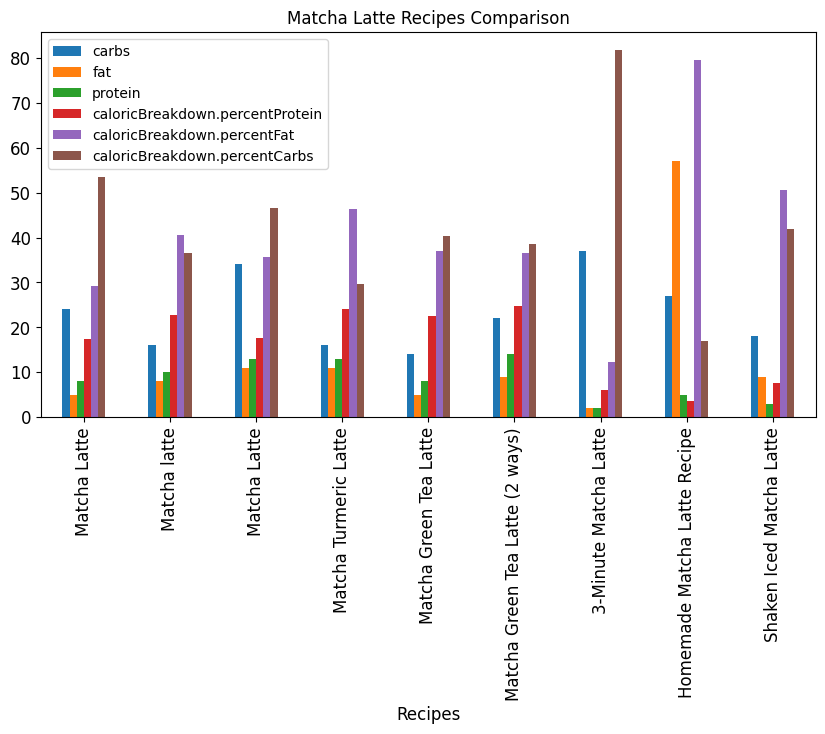

In [102]:
# graph of all numeric values between the different matcha recipes
ax = matcha_latte_graph.plot(kind='bar', title ="Matcha Latte Recipes Comparison", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Recipes", fontsize=12)
ax.set_xticklabels(matcha_latte['title'])
plt.show()

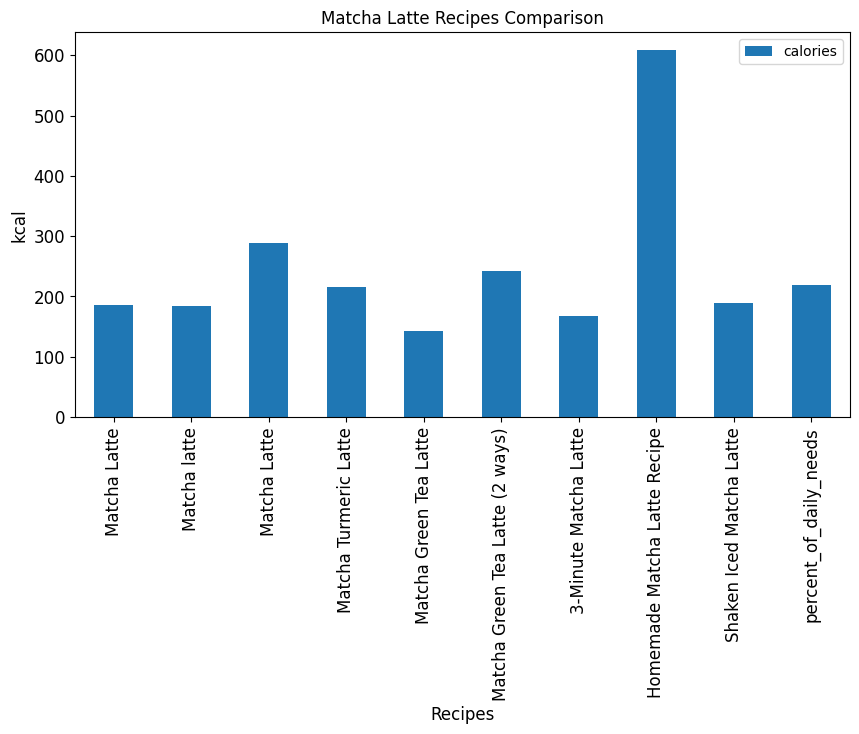

In [1039]:
# graph of the calories between the different matcha recipes
ax = matcha_latte_graph[['calories']].plot(kind='bar', title ="Matcha Latte Recipes Comparison", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Recipes", fontsize=12)
ax.set_ylabel("kcal", fontsize=12)
ax.set_xticklabels(matcha_latte['title'])
plt.show()

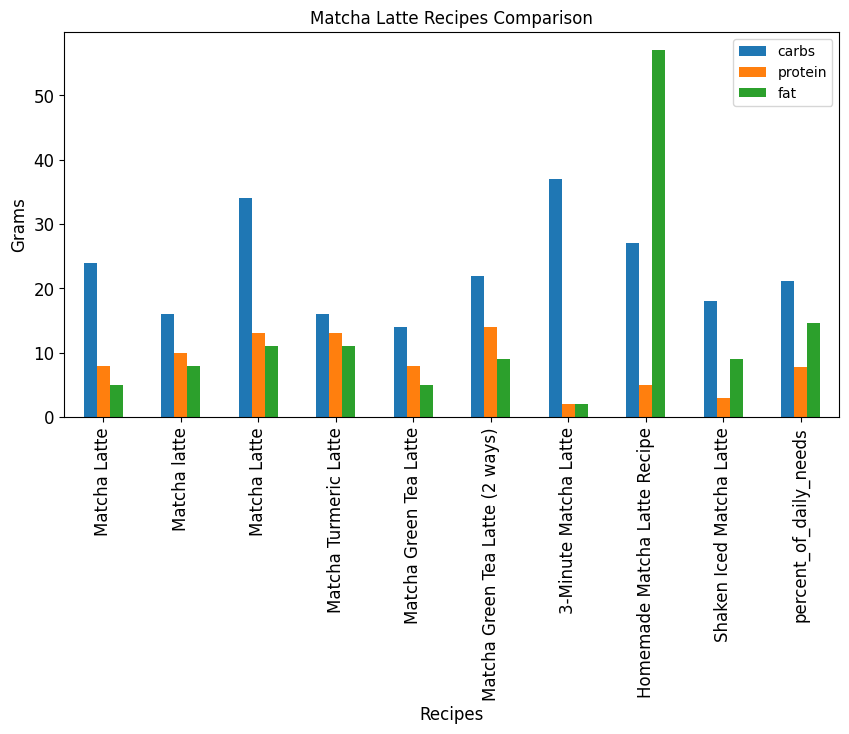

In [1038]:
# graph of the calories between the different matcha recipes
ax = matcha_latte_graph[['carbs', 'protein', 'fat']].plot(kind='bar', title ="Matcha Latte Recipes Comparison", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Recipes", fontsize=12)
ax.set_ylabel("Grams", fontsize=12)
ax.set_xticklabels(matcha_latte['title'])
plt.show()

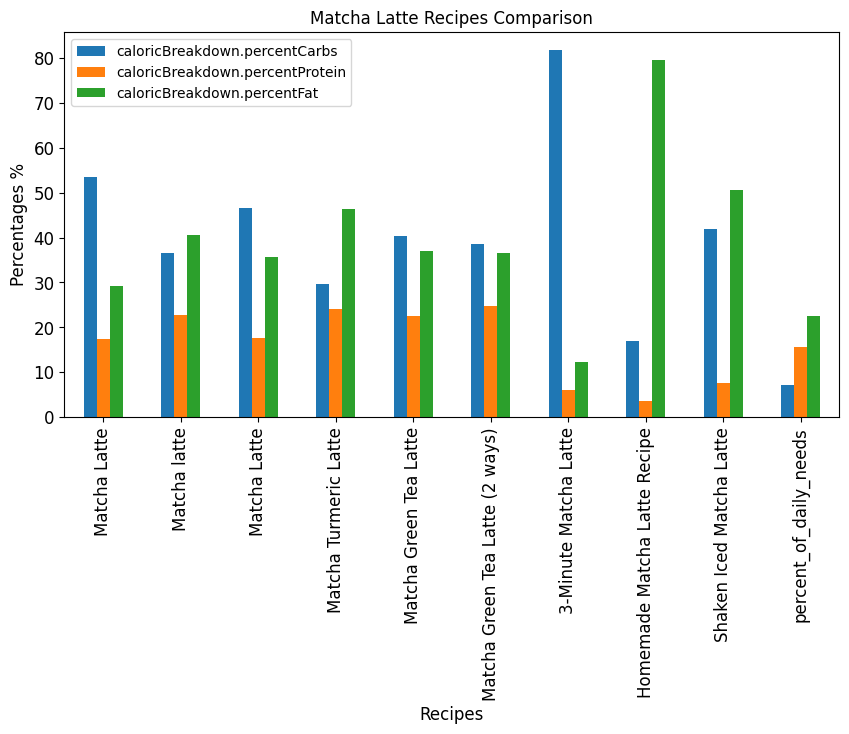

In [1041]:
# graph of the calories between the different matcha recipes
ax = matcha_latte_graph[['caloricBreakdown.percentCarbs', 'caloricBreakdown.percentProtein', 'caloricBreakdown.percentFat']].plot(kind='bar', title ="Matcha Latte Recipes Comparison", figsize=(10, 5), legend=True, fontsize=12)
ax.set_xlabel("Recipes", fontsize=12)
ax.set_ylabel("Percentages %", fontsize=12)
ax.set_xticklabels(matcha_latte['title'])
plt.show()

#### Difference between Ingredients

In [1042]:
matcha_latte

,id,title,calories,carbs,fat,protein,bad,good,nutrients,properties,flavonoids,ingredients,caloricBreakdown.percentProtein,caloricBreakdown.percentFat,caloricBreakdown.percentCarbs,weightPerServing.amount,weightPerServing.unit
0,191754.0,Matcha Latte,186.00,24.00,5.00,8.00,"[{'title': 'Calories', 'amount': '186', 'inden...","[{'title': 'Protein', 'amount': '8g', 'indente...","[{'name': 'Calories', 'amount': 186.9, 'unit':...","[{'name': 'Glycemic Index', 'amount': 53.0, 'u...","[{'name': 'Cyanidin', 'amount': 0.0, 'unit': '...","[{'id': 19912, 'name': 'agave syrup', 'amount'...",17.44,29.11,53.45,208.0,g
1,1087495.0,Matcha latte,185.00,16.00,8.00,10.00,"[{'title': 'Calories', 'amount': '185', 'inden...","[{'title': 'Protein', 'amount': '10g', 'indent...","[{'name': 'Calories', 'amount': 185.6, 'unit':...","[{'name': 'Glycemic Index', 'amount': 74.5, 'u...","[{'name': 'Cyanidin', 'amount': 0.0, 'unit': '...","[{'id': 98932, 'name': 'matcha tea', 'amount':...",22.84,40.55,36.61,269.0,g
2,1698719.0,Matcha Latte,289.00,34.00,11.00,13.00,"[{'title': 'Calories', 'amount': '289', 'inden...","[{'title': 'Protein', 'amount': '13g', 'indent...","[{'name': 'Calories', 'amount': 289.44, 'unit'...","[{'name': 'Glycemic Index', 'amount': 128.27, ...","[{'name': 'Cyanidin', 'amount': 0.0, 'unit': '...","[{'id': 98932, 'name': 'matcha powder )', 'amo...",17.70,35.70,46.60,404.0,g
3,845201.0,Matcha Turmeric Latte,216.00,16.00,11.00,13.00,"[{'title': 'Calories', 'amount': '216', 'inden...","[{'title': 'Protein', 'amount': '13g', 'indent...","[{'name': 'Calories', 'amount': 216.73, 'unit'...","[{'name': 'Glycemic Index', 'amount': 60.42, '...","[{'name': 'Cyanidin', 'amount': 0.0, 'unit': '...","[{'id': 4047, 'name': 'coconut oil', 'amount':...",23.99,46.39,29.62,428.0,g
4,508979.0,Matcha Green Tea Latte,143.00,14.00,5.00,8.00,"[{'title': 'Calories', 'amount': '143', 'inden...","[{'title': 'Protein', 'amount': '8g', 'indente...","[{'name': 'Calories', 'amount': 143.08, 'unit'...","[{'name': 'Glycemic Index', 'amount': 90.27, '...","[{'name': 'Cyanidin', 'amount': 0.0, 'unit': '...","[{'id': 19296, 'name': 'honey', 'amount': 1.0,...",22.59,37.10,40.31,253.0,g
5,779401.0,Matcha Green Tea Latte (2 ways),243.00,22.00,9.00,14.00,"[{'title': 'Calories', 'amount': '243', 'inden...","[{'title': 'Protein', 'amount': '14g', 'indent...","[{'name': 'Calories', 'amount': 243.81, 'unit'...","[{'name': 'Glycemic Index', 'amount': 198.0, '...","[{'name': 'Cyanidin', 'amount': 0.0, 'unit': '...","[{'id': 10014412, 'name': 'ice', 'amount': 1.0...",24.79,36.64,38.57,568.0,g
6,1081113.0,3-Minute Matcha Latte,167.00,37.00,2.00,2.00,"[{'title': 'Calories', 'amount': '167', 'inden...","[{'title': 'Protein', 'amount': '2g', 'indente...","[{'name': 'Calories', 'amount': 167.89, 'unit'...","[{'name': 'Glycemic Index', 'amount': 0.0, 'un...","[{'name': 'Cyanidin', 'amount': 0.0, 'unit': '...","[{'id': 14412, 'name': 'water', 'amount': 1.0,...",5.98,12.34,81.68,292.0,g
7,1179267.0,Homemade Matcha Latte Recipe,608.00,27.00,57.00,5.00,"[{'title': 'Calories', 'amount': '608', 'inden...","[{'title': 'Protein', 'amount': '5g', 'indente...","[{'name': 'Calories', 'amount': 608.51, 'unit'...","[{'name': 'Glycemic Index', 'amount': 68.5, 'u...","[{'name': 'Cyanidin', 'amount': 0.0, 'unit': '...","[{'id': 10011238, 'name': 'mushroom mix', 'amo...",3.50,79.61,16.89,297.0,g
8,1011530.0,Shaken Iced Matcha Latte,190.00,18.00,9.00,3.00,"[{'title': 'Calories', 'amount': '190', 'inden...","[{'title': 'Protein', 'amount': '3g', 'indente...","[{'name': 'Calories', 'amount': 190.09, 'unit'...","[{'name': 'Glycemic Index', 'amount': 36.5, 'u...","[{'name': 'Cyanidin', 'amount': 0.0, 'unit': '...","[{'id': 93607, 'name': 'almond milk', 'amount'...",7.55,50.50,41.95,658.0,g
9,NaN,percent_of_daily_needs,218.41,21.23,14.64,7.82,NaN,NaN,NaN,NaN,NaN,NaN,15.63,22.52,7.08,NaN,NaN


In [1043]:
matcha_ingred = matcha_latte['ingredients'][6]
matcha_ingred2 = matcha_latte['ingredients'][7]

In [1046]:
matcha_df = pd.DataFrame(matcha_ingred)
matcha_df2 = pd.DataFrame(matcha_ingred2)
display(matcha_df)
display(matcha_df2)

,id,name,amount,unit,nutrients
0,14412,water,1.0,cup,"[{'name': 'Net Carbohydrates', 'amount': 0.0, ..."
1,98932,matcha powder,0.5,teaspoon,"[{'name': 'Net Carbohydrates', 'amount': 0.0, ..."
2,9421,medjool dates,2.0,,"[{'name': 'Net Carbohydrates', 'amount': 32.77..."
3,12088,cashew butter,1.0,teaspoon,"[{'name': 'Net Carbohydrates', 'amount': 1.26,..."


,id,name,amount,unit,nutrients
0,10011238,mushroom mix,1.5,tsp,"[{'name': 'Vitamin B1', 'amount': 0.0, 'unit':..."
1,14412,water,2.0,Tbsp,"[{'name': 'Net Carbohydrates', 'amount': 0.0, ..."
2,19911,maple syrup,1.0,Tbsp,"[{'name': 'Vitamin B12', 'amount': 0.0, 'unit'..."
3,12117,unsweetened coconut milk,1.0,cup,"[{'name': 'Net Carbohydrates', 'amount': 8.02,..."


#### Difference between Nutriention

In [1050]:
matcha_lat_nutri = pd.DataFrame(matcha_latte['nutrients'][6])
matcha_Lat_nutri2 = pd.DataFrame(matcha_latte['nutrients'][7])
display(matcha_lat_nutri)
display(matcha_Lat_nutri2)

,name,amount,unit,percentOfDailyNeeds
0,Calories,167.89,kcal,8.39
1,Fat,2.51,g,3.86
2,Saturated Fat,0.48,g,3.01
3,Carbohydrates,37.34,g,12.45
4,Net Carbohydrates,34.03,g,12.37
5,Sugar,31.91,g,35.45
6,Cholesterol,0.00,mg,0.00
7,Sodium,13.05,mg,0.57
8,Protein,2.73,g,5.47
9,Copper,0.32,mg,15.98


,name,amount,unit,percentOfDailyNeeds
0,Calories,608.51,kcal,30.43
1,Fat,57.16,g,87.93
2,Saturated Fat,50.64,g,316.50
3,Carbohydrates,27.27,g,9.09
4,Net Carbohydrates,21.81,g,7.93
5,Sugar,20.18,g,22.42
6,Cholesterol,0.00,mg,0.00
7,Sodium,39.97,mg,1.74
8,Protein,5.66,g,11.32
9,Manganese,2.68,mg,133.77


#### Difference between Flavonoids

##### Flavonoids are various compounds found naturally in many fruits and vegetables. They’re also in plant products like wine, tea, and chocolate. There are six different types of flavonoids found in food, and each kind is broken down by your body in a different way.

In [826]:
# No difference, both with nothing.

In [824]:
matcha_latte['flavonoids'][0]

[{'name': 'Cyanidin', 'amount': 0.0, 'unit': ''},
 {'name': 'Petunidin', 'amount': 0.0, 'unit': ''},
 {'name': 'Delphinidin', 'amount': 0.0, 'unit': ''},
 {'name': 'Malvidin', 'amount': 0.0, 'unit': ''},
 {'name': 'Pelargonidin', 'amount': 0.0, 'unit': ''},
 {'name': 'Peonidin', 'amount': 0.0, 'unit': ''},
 {'name': 'Catechin', 'amount': 0.0, 'unit': ''},
 {'name': 'Epigallocatechin', 'amount': 0.0, 'unit': ''},
 {'name': 'Epicatechin', 'amount': 0.0, 'unit': ''},
 {'name': 'Epicatechin 3-gallate', 'amount': 0.0, 'unit': ''},
 {'name': 'Epigallocatechin 3-gallate', 'amount': 0.0, 'unit': ''},
 {'name': 'Theaflavin', 'amount': 0.0, 'unit': ''},
 {'name': 'Thearubigins', 'amount': 0.0, 'unit': ''},
 {'name': 'Eriodictyol', 'amount': 0.0, 'unit': ''},
 {'name': 'Hesperetin', 'amount': 0.0, 'unit': ''},
 {'name': 'Naringenin', 'amount': 0.0, 'unit': ''},
 {'name': 'Apigenin', 'amount': 0.0, 'unit': ''},
 {'name': 'Luteolin', 'amount': 0.0, 'unit': ''},
 {'name': 'Isorhamnetin', 'amount': 0

In [823]:
matcha_latte['flavonoids'][1]

[{'name': 'Cyanidin', 'amount': 0.0, 'unit': ''},
 {'name': 'Petunidin', 'amount': 0.0, 'unit': ''},
 {'name': 'Delphinidin', 'amount': 0.0, 'unit': ''},
 {'name': 'Malvidin', 'amount': 0.0, 'unit': ''},
 {'name': 'Pelargonidin', 'amount': 0.0, 'unit': ''},
 {'name': 'Peonidin', 'amount': 0.0, 'unit': ''},
 {'name': 'Catechin', 'amount': 0.0, 'unit': ''},
 {'name': 'Epigallocatechin', 'amount': 0.0, 'unit': ''},
 {'name': 'Epicatechin', 'amount': 0.0, 'unit': ''},
 {'name': 'Epicatechin 3-gallate', 'amount': 0.0, 'unit': ''},
 {'name': 'Epigallocatechin 3-gallate', 'amount': 0.0, 'unit': ''},
 {'name': 'Theaflavin', 'amount': 0.0, 'unit': ''},
 {'name': 'Thearubigins', 'amount': 0.0, 'unit': ''},
 {'name': 'Eriodictyol', 'amount': 0.0, 'unit': ''},
 {'name': 'Hesperetin', 'amount': 0.0, 'unit': ''},
 {'name': 'Naringenin', 'amount': 0.0, 'unit': ''},
 {'name': 'Apigenin', 'amount': 0.0, 'unit': ''},
 {'name': 'Luteolin', 'amount': 0.0, 'unit': ''},
 {'name': 'Isorhamnetin', 'amount': 0

### Difference Between recipe with the highest carb% and recipe with the highest fat%

In [800]:
highest_carb_recp = recipes_df[(recipes_df['caloricBreakdown.percentCarbs'] >= 95) & (recipes_df['ingredients'].notnull())]

In [801]:
highest_carb_recp

,id,title,calories,carbs,fat,protein,bad,good,nutrients,properties,flavonoids,ingredients,caloricBreakdown.percentProtein,caloricBreakdown.percentFat,caloricBreakdown.percentCarbs,weightPerServing.amount,weightPerServing.unit
158,512256,"Pomegranate, Blueberry, Matcha Tea Slushy | An...",37,15g,0.21g,0.31g,"[{'title': 'Calories', 'amount': '37', 'indent...","[{'title': 'Protein', 'amount': '0.31g', 'inde...","[{'name': 'Calories', 'amount': 37.0, 'unit': ...","[{'name': 'Glycemic Index', 'amount': 10.0, 'u...","[{'name': 'Cyanidin', 'amount': 3.72, 'unit': ...","[{'id': 9050, 'name': 'blueberries', 'amount':...",1.89,2.87,95.24,123.0,g


In [812]:
highest_fat_recp = recipes_df[(recipes_df['caloricBreakdown.percentFat'] >= 82) &
                              (recipes_df['ingredients'].notnull())]

In [813]:
highest_fat_recp

,id,title,calories,carbs,fat,protein,bad,good,nutrients,properties,flavonoids,ingredients,caloricBreakdown.percentProtein,caloricBreakdown.percentFat,caloricBreakdown.percentCarbs,weightPerServing.amount,weightPerServing.unit
139,1095679,Strawberry Matcha Chia Pudding,412,12g,40g,6g,"[{'title': 'Calories', 'amount': '412', 'inden...","[{'title': 'Protein', 'amount': '6g', 'indente...","[{'name': 'Calories', 'amount': 412.7, 'unit':...","[{'name': 'Glycemic Index', 'amount': 137.0, '...","[{'name': 'Cyanidin', 'amount': 0.24, 'unit': ...","[{'id': 98932, 'name': 'matcha powder', 'amoun...",6.33,82.65,11.02,198.0,g


#### Difference between Ingredients

In [818]:
highest_carb_ingred = highest_carb_recp['ingredients'][158]
carb_ingred_df = pd.DataFrame(highest_carb_ingred)
carb_ingred_df

,id,name,amount,unit,nutrients
0,9050,blueberries,35.0,g,"[{'name': 'Net Carbohydrates', 'amount': 4.24,..."
1,10014412,ice cubes,50.0,g,"[{'name': 'Net Carbohydrates', 'amount': 0.0, ..."
2,9442,pomegranate juice,30.0,ml,"[{'name': 'Net Carbohydrates', 'amount': 4.1, ..."
3,99190,sukrin sweetener,0.5,Tablespoons,"[{'name': 'Net Carbohydrates', 'amount': 0.0, ..."


In [819]:
highest_fat_ingred = highest_fat_recp['ingredients'][139]
fat_ingred_df = pd.DataFrame(highest_fat_ingred)
fat_ingred_df

,id,name,amount,unit,nutrients
0,98932,matcha powder,2.0,g,"[{'name': 'Net Carbohydrates', 'amount': 0.0, ..."
1,12118,coconut milk,175.0,ml,"[{'name': 'Net Carbohydrates', 'amount': 4.7, ..."
2,12006,chia seeds,15.0,g,"[{'name': 'Net Carbohydrates', 'amount': 1.16,..."
3,9316,strawberries,2.0,small,"[{'name': 'Net Carbohydrates', 'amount': 0.8, ..."


#### Difference between Flavonoid

In [827]:
highest_carb_flav = highest_carb_recp['flavonoids'][158]
carb_flav_df = pd.DataFrame(highest_carb_flav)
carb_flav_df

,name,amount,unit
0,Cyanidin,3.72,mg
1,Petunidin,11.04,mg
2,Delphinidin,12.66,mg
3,Malvidin,23.66,mg
4,Pelargonidin,0.03,mg
5,Peonidin,7.10,mg
6,Catechin,1.85,mg
7,Epigallocatechin,0.23,mg
8,Epicatechin,0.22,mg
9,Epicatechin 3-gallate,0.00,mg


In [828]:
highest_fat_flav = highest_fat_recp['flavonoids'][139]
fat_flav_df = pd.DataFrame(highest_fat_flav)
fat_flav_df

,name,amount,unit
0,Cyanidin,0.24,mg
1,Petunidin,0.02,mg
2,Delphinidin,0.04,mg
3,Malvidin,0.00,mg
4,Pelargonidin,3.48,mg
5,Peonidin,0.01,mg
6,Catechin,0.44,mg
7,Epigallocatechin,0.11,mg
8,Epicatechin,0.06,mg
9,Epicatechin 3-gallate,0.02,mg


## All cocoa powder recipes

In [655]:
cocoa_test_querystring = {"includeIngredients": "cocoa powder", "offset":"0", "number":"1"}
test_cocoa = requests.request("GET", recipe_url, headers=recipe_headers, params=cocoa_test_querystring)
test_cocoa.text

'{"results":[{"id":812966,"title":"Low Carb Frosty","image":"https://spoonacular.com/recipeImages/812966-312x231.jpg","imageType":"jpg"}],"offset":0,"number":1,"totalResults":14659}'

In [656]:
empty_list2 = []
#a loop is created to show 100 recipes and then appended into a new dataframe
for i in range(9):
    cocoa_querystring = {"includeIngredients": "cocoa powder", "offset":f'{i*100}', "number":"100"}
    response_cocoa = requests.request("GET", recipe_url, headers=recipe_headers, params=cocoa_querystring)
    recipes_cocoa_json = cocoa_response.json()
    recipes_cocoa_df = pd.json_normalize(recipes_cocoa_json['results'])
    empty_list2.append(recipes_cocoa_df)
cocoa_df = pd.concat(empty_list2, ignore_index=True)

### Random samples

In [657]:
# pick around 200 random samples
cocoa_sample = cocoa_df.sample(n = 200, ignore_index=True)
cocoa_sample.head()

,id,title,image,imageType
0,971665,Healthy Hot Cocoa + GIVEAWAY,https://spoonacular.com/recipeImages/971665-31...,jpg
1,670366,Raw Vegan Chocolate Covered Strawberry Fudgesi...,https://spoonacular.com/recipeImages/670366-31...,jpg
2,585829,Dark Chocolate Football Cake,https://spoonacular.com/recipeImages/585829-31...,png
3,556838,"Homemade Chocolate Hazelnut ""Larabars",https://spoonacular.com/recipeImages/556838-31...,jpg
4,495457,Vegan Pumpkin Mug Brownie,https://spoonacular.com/recipeImages/495457-31...,jpg


In [658]:
# delete image/imageType
#del cocoa_sample['imageType']
cocoa_sample.head()

,id,title,image,imageType
0,971665,Healthy Hot Cocoa + GIVEAWAY,https://spoonacular.com/recipeImages/971665-31...,jpg
1,670366,Raw Vegan Chocolate Covered Strawberry Fudgesi...,https://spoonacular.com/recipeImages/670366-31...,jpg
2,585829,Dark Chocolate Football Cake,https://spoonacular.com/recipeImages/585829-31...,png
3,556838,"Homemade Chocolate Hazelnut ""Larabars",https://spoonacular.com/recipeImages/556838-31...,jpg
4,495457,Vegan Pumpkin Mug Brownie,https://spoonacular.com/recipeImages/495457-31...,jpg


In [663]:
id_numbers_cocoa = cocoa_sample['id']
id_list_cc = []
for i in range(len(id_numbers_cocoa)):
    append_ids_cocoa = id_numbers_cocoa[i]
    id_list_cc.append(append_ids_cocoa)

## Query through Nutrition by Id with Cocoa recipes

In [680]:
cc_nutrition_list = []

# for loop for every id number add the nutrition dataset into a new dataframe
for ids in id_list_cc:
    nutrition_url = "https://spoonacular-recipe-food-nutrition-v1.p.rapidapi.com/recipes/{}/nutritionWidget.json".format(ids)
    nutrition_cc_response = requests.request("GET", nutrition_url, headers=nutrition_headers)
    nutrition_cc_json = nutrition_cc_response.json()
    nutrition_cc_df = pd.json_normalize(nutrition_cc_json)
    cc_nutrition_list.append(nutrition_cc_df)
cocoa_nutri_df = pd.concat(cc_nutrition_list, ignore_index=True)

In [681]:
cocoa_nutri_df.head()

,calories,carbs,fat,protein,bad,good,expires,isStale,nutrients,properties,flavonoids,ingredients,caloricBreakdown.percentProtein,caloricBreakdown.percentFat,caloricBreakdown.percentCarbs,weightPerServing.amount,weightPerServing.unit
0,629k,30g,58g,6g,"[{'title': 'Calories', 'amount': '629k', 'inde...","[{'title': 'Protein', 'amount': '6g', 'indente...",1638267426928,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,135,17g,8g,1g,"[{'title': 'Calories', 'amount': '135', 'inden...","[{'title': 'Protein', 'amount': '1g', 'indente...",1671694410404,False,"[{'name': 'Calories', 'amount': 135.42, 'unit'...","[{'name': 'Glycemic Index', 'amount': 9.71, 'u...","[{'name': 'Cyanidin', 'amount': 0.57, 'unit': ...","[{'id': 93607, 'name': 'almond milk', 'amount'...",5.22,48.87,45.91,112.0,g
2,289,38g,5g,23g,"[{'title': 'Calories', 'amount': '289', 'inden...","[{'title': 'Protein', 'amount': '23g', 'indent...",1671694411040,False,"[{'name': 'Calories', 'amount': 289.96, 'unit'...","[{'name': 'Glycemic Index', 'amount': 14.13, '...","[{'name': 'Cyanidin', 'amount': 0.0, 'unit': '...","[{'id': 18371, 'name': 'baking powder', 'amoun...",31.68,15.85,52.47,159.0,g
3,72,5g,5g,1g,"[{'title': 'Calories', 'amount': '72', 'indent...","[{'title': 'Protein', 'amount': '1g', 'indente...",1671694411624,False,"[{'name': 'Calories', 'amount': 72.54, 'unit':...","[{'name': 'Glycemic Index', 'amount': 3.84, 'u...","[{'name': 'Cyanidin', 'amount': 0.4, 'unit': '...","[{'id': 12087, 'name': 'cashews', 'amount': 0....",9.81,62.60,27.59,15.0,g
4,219k,46g,3g,3g,"[{'title': 'Calories', 'amount': '219k', 'inde...","[{'title': 'Protein', 'amount': '3g', 'indente...",1638350608502,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cocoa Dataframe NaN values

In [700]:
cocoa_recipes_df = pd.concat([cocoa_sample,cocoa_nutri_df], axis = 1, join='inner')
cocoa_recipes_df.head()

,id,title,image,imageType,calories,carbs,fat,protein,bad,good,...,isStale,nutrients,properties,flavonoids,ingredients,caloricBreakdown.percentProtein,caloricBreakdown.percentFat,caloricBreakdown.percentCarbs,weightPerServing.amount,weightPerServing.unit
0,971665,Healthy Hot Cocoa + GIVEAWAY,https://spoonacular.com/recipeImages/971665-31...,jpg,629k,30g,58g,6g,"[{'title': 'Calories', 'amount': '629k', 'inde...","[{'title': 'Protein', 'amount': '6g', 'indente...",...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,670366,Raw Vegan Chocolate Covered Strawberry Fudgesi...,https://spoonacular.com/recipeImages/670366-31...,jpg,135,17g,8g,1g,"[{'title': 'Calories', 'amount': '135', 'inden...","[{'title': 'Protein', 'amount': '1g', 'indente...",...,False,"[{'name': 'Calories', 'amount': 135.42, 'unit'...","[{'name': 'Glycemic Index', 'amount': 9.71, 'u...","[{'name': 'Cyanidin', 'amount': 0.57, 'unit': ...","[{'id': 93607, 'name': 'almond milk', 'amount'...",5.22,48.87,45.91,112.0,g
2,585829,Dark Chocolate Football Cake,https://spoonacular.com/recipeImages/585829-31...,png,289,38g,5g,23g,"[{'title': 'Calories', 'amount': '289', 'inden...","[{'title': 'Protein', 'amount': '23g', 'indent...",...,False,"[{'name': 'Calories', 'amount': 289.96, 'unit'...","[{'name': 'Glycemic Index', 'amount': 14.13, '...","[{'name': 'Cyanidin', 'amount': 0.0, 'unit': '...","[{'id': 18371, 'name': 'baking powder', 'amoun...",31.68,15.85,52.47,159.0,g
3,556838,"Homemade Chocolate Hazelnut ""Larabars",https://spoonacular.com/recipeImages/556838-31...,jpg,72,5g,5g,1g,"[{'title': 'Calories', 'amount': '72', 'indent...","[{'title': 'Protein', 'amount': '1g', 'indente...",...,False,"[{'name': 'Calories', 'amount': 72.54, 'unit':...","[{'name': 'Glycemic Index', 'amount': 3.84, 'u...","[{'name': 'Cyanidin', 'amount': 0.4, 'unit': '...","[{'id': 12087, 'name': 'cashews', 'amount': 0....",9.81,62.60,27.59,15.0,g
4,495457,Vegan Pumpkin Mug Brownie,https://spoonacular.com/recipeImages/495457-31...,jpg,219k,46g,3g,3g,"[{'title': 'Calories', 'amount': '219k', 'inde...","[{'title': 'Protein', 'amount': '3g', 'indente...",...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [711]:
cocoa_null = cocoa_recipes_df.loc[cocoa_recipes_df['caloricBreakdown.percentCarbs'].isnull()]
cocoa_null_index = cocoa_null.tail(50)
index_list = cocoa_null_index.index.values

In [716]:
index_list

array([ 67,  72,  74,  75,  81,  82,  83,  84,  89,  90,  91,  99, 100,
       101, 102, 103, 106, 107, 110, 113, 114, 115, 116, 117, 121, 122,
       124, 125, 126, 133, 136, 139, 146, 153, 156, 160, 161, 163, 165,
       172, 176, 177, 179, 180, 183, 188, 189, 195, 196, 197], dtype=int64)